# Schätzverfahren in dynamischen Systemen - Übung 1

__Python-Bibliotheken__ einlesen:

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from IPython.display import display, Math
np.set_printoptions(precision=5)


<a id="Aufgabe-1"></a>
## Aufgabe 1:

Unkorellierte Beobachtungen einlesen:
***

In [2]:
input1 = np.loadtxt("ue01_bsp1.txt")
#print(input1)

### Gauss Markov Modell (A-Modell):

$\quad \underbrace{y}_{m\times 1} = \underbrace{A}_{m\times n} \underbrace{x}_{n\times 1} + \underbrace{e}_{m\times 1}$

Aufstellen des Beobachtungsvektors y, der Designmatrix A, des Unbekanntenvektors x, der Residuen e und der Gewichtsmatrix P:

$\quad \underbrace{y}_{5\times 1} = \left[\begin{array}{r}
m_1\\
m_2\\
m_3\\
m_4\\
m_5\\
\end{array}\right] $ ,$\quad$ $ \underbrace{A}_{5\times 3} = \left[\begin{array}{rrrrr}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
1 & 1 & 0\\
0 & 1 & 1\\
\end{array}\right] $ ,$\quad$ $ \underbrace{x}_{3\times 1} = \left[\begin{array}{r}
\overline{AB}\\
\overline{BC}\\
\overline{CD}\\
\end{array}\right] $ ,$\quad$ $ \underbrace{e}_{5\times 1} = \left[\begin{array}{r}
e_1\\
e_2\\
e_3\\
e_4\\
e_5\\
\end{array}\right] $ ,$\quad$ $ \underbrace{P}_{5\times 5} = \left[\begin{array}{rrrr}
0.1^2 & 0 & 0 & 0 & 0\\
0 & 0.1^2 & 0 & 0 & 0\\
0 & 0 & 0.1^2 & 0 & 0\\
0 & 0 & 0 & 0.2^2 & 0\\
0 & 0 & 0 & 0 & 0.2^2 \\
\end{array}\right] $

Kleinste Quadrate Ausgleichung für die erste Epoche (t=0)

In [3]:
m = 5.0
n = 3.0
t = 0
y = input1[t,1:,] # Get First Row of imported Dateset
y = y[:, np.newaxis] # For visual improvement -> [1x5] vector to [5x1]  
A = np.matrix([[ 1, 0, 0], [ 0, 1, 0 ], [ 0, 0, 1 **2], [ 1, 1, 0 ], [ 0, 1, 1 ]])
P = np.diag([0.1**2,0.1**2,0.1**2,0.2**2,0.2**2])
#erw_matrix = np.append(A, y, axis=1)
# Rang
#print('Erweiterte Koeffizientenmatrix [A|y]:\n {}\n'.format(erw_matrix))
#print('Rang[A|y]\n {} \n'.format(matrix_rank(erw_matrix)))
#print('Rang[A]\n {} \n'.format(matrix_rank(A)))

# Print Matrices
#print('y = \n {} \n'.format(y))
#print('A = \n {} \n'.format(A))
#print('P = \n {} \n'.format(P))

Berechne Schätzwerte $\hat{x}, \hat{y}, \hat{e}$:

$\quad \hat{x} = (A' P A)^{-1} A' P y$

$\quad \hat{y} = A \hat{x}$

$\quad \hat{e} = y - \hat{y}$

In [4]:
x_hat = inv(np.transpose(A) @ P @ A) @ np.transpose(A) @ P @ y
y_hat = A @ x_hat
e_hat = y - y_hat

# Print x_hat
#display(Math('\hat{{x}}=')); 
#print(x_hat)

# Print y_hat
#display(Math('\hat{{y}}=')); 
#print(y_hat)

# Print e_hat
#display(Math('\hat{{e}}=')); 
#print(e_hat)

__Proben:__
- Orthogonalitätsprobe: $A' P \hat{e} \overset{!}{=} 0$
- Hauptprobe: $\hat{y}-A\hat{x} \overset{!}{=} 0 $

In [5]:
probe_ortho = np.transpose(A) @ P @ e_hat
probe_haupt = y_hat - A @ x_hat

# Print Orthogonalitätsprobe
print('Orthogonalitätsprobe = \n {} \n'.format(probe_ortho))

# Print Hauptprobe
print('Hauptprobe = \n {} \n'.format(probe_haupt))

Orthogonalitätsprobe = 
 [[ 5.76796e-17]
 [ 4.90059e-17]
 [-2.64545e-17]] 

Hauptprobe = 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]] 



__Stochastisches Modell:__
- A posteriori Wert: $\hat{\sigma}^2_0 = \frac{\hat{e}' P \hat{e}}{m-n} $
- Varianzen der geschätzten Parameter: $\hat{\sum}_{\hat{x}} = \hat{\sigma}^2_0 N^{-1} = \hat{\sigma}^2_0 (A' P A)^{-1}$

In [6]:
s02 = np.asscalar((np.transpose(e_hat) @ P @ e_hat)/(m-n))

Sxx = s02 * inv(np.transpose(A) @ P @ A)
Syy = A @ Sxx @ np.transpose(A)

display(Math('\hat{{\sigma}}={:.4f}'.format(s02)));
display(Math('\hat{{\sum}}_{\hat{x}}='));
print(Sxx)
display(Math('\hat{{\sum}}_{\hat{y}}='));
print(Syy)

#some arrays which we use later for plotting
time_array = np.arange(0,11)
AB_array = np.zeros(11)
BC_array = np.zeros(11)
CD_array = np.zeros(11)
sigmaAB = np.zeros(11)
sigmaBC = np.zeros(11)
sigmaCD = np.zeros(11)

#store the results in the first array element
time_array[0] = 0
AB_array[0] = x_hat[0]
BC_array[0] = x_hat[1]
CD_array[0] = x_hat[2]
sigmaAB[0] = np.sqrt(Sxx[0,0])
sigmaBC[0] = np.sqrt(Sxx[1,1])
sigmaCD[0] = np.sqrt(Sxx[2,2])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[ 0.03212 -0.02215  0.01772]
 [-0.02215  0.02769 -0.02215]
 [ 0.01772 -0.02215  0.03212]]


<IPython.core.display.Math object>

[[ 0.03212 -0.02215  0.01772  0.00997 -0.00443]
 [-0.02215  0.02769 -0.02215  0.00554  0.00554]
 [ 0.01772 -0.02215  0.03212 -0.00443  0.00997]
 [ 0.00997  0.00554 -0.00443  0.01551  0.00111]
 [-0.00443  0.00554  0.00997  0.00111  0.01551]]


Sequentielle Ausgleichung:

In [7]:
#processing the observations at t_k
for t in np.arange(1,11):
    #storing the "old" states and variances
    x_hat_old = x_hat
    s02_old = s02
    Sxx_old = Sxx
    
    #processing the observations at t_k
    A = A # Same Designmatrix A for each epoche
    y = input1[t,1:,] # Get First Row of imported Dateset
    y = y[:, np.newaxis] # For visual improvement -> [1x5] vector to [5x1]  
    x_hat = x_hat_old + inv(s02_old * inv(Sxx_old) + np.transpose(A) @ P @ A) @ np.transpose(A) @ P @ (y-A @ x_hat_old)
    dx_hat = x_hat - x_hat_old
    y_hat = A @ x_hat
    e_hat = y - y_hat
    s02 = np.asscalar(1.0/(m-n) * (s02_old * (m-n + np.transpose(dx_hat) @ inv(Sxx_old) @ dx_hat) + np.transpose(e_hat) @ P @ e_hat))
    Sxx = s02 * inv(s02_old * inv(Sxx_old) + np.transpose(A) @ P @ A)
    
    #probe_ortho = np.transpose(A) @ P @ e_hat
    #probe_haupt = y_hat - A @ x_hat
    # Print Orthogonalitätsprobe
    #print('Orthogonalitätsprobe = \n {} \n'.format(probe_ortho))
    # Print Hauptprobe
    #print('Hauptprobe = \n {} \n'.format(probe_haupt))
    
    #storing the solution in the array which we will later use for plotting
    time_array[t]=t
    AB_array[t]=x_hat[0]
    BC_array[t]=x_hat[1]
    CD_array[t]=x_hat[2]
    sigmaAB[t]=np.sqrt(Sxx[0,0])
    sigmaBC[t]=np.sqrt(Sxx[1,1])
    sigmaCD[t]=np.sqrt(Sxx[2,2])
    
    #print("--")
    #print(AB_array[t])
    #print(BC_array[t])  
    #print(CD_array[t])
    #print(sigmaAB[t]) 
    #print(sigmaBC[t]) 
    #print(sigmaCD[t]) 

Die Abstände $\overline{AB}$, $\overline{BC}$ und $\overline{CD}$, sowie deren formelle Fehler nach einer Epoche sowie nach 6 und 11 Epochen unter Einbeziehung der Messungen aller vorangegangenen Epochen.

In [8]:
# Epoche 1

print('\033[4m\033[1m' "Epoche 1:")
display(Math('\hat{{x}}_\overline{{AB}}={:.4f}'.format(AB_array[0])));
display(Math('\hat{{x}}_\overline{{BC}}={:.4f}'.format(BC_array[0])));
display(Math('\hat{{x}}_\overline{{CD}}={:.4f}'.format(CD_array[0])));
display(Math('\hat{{\sigma}}_{{\overline{{AB}}}}={:.4f}'.format(sigmaAB[0])));
display(Math('\hat{{\sigma}}_{{\overline{{BC}}}}={:.4f}'.format(sigmaBC[0])));
display(Math('\hat{{\sigma}}_{{\overline{{CD}}}}={:.4f}'.format(sigmaCD[0])));
print('\n\033[4m\033[1m' "Epoche 6:")
display(Math('\hat{{x}}_\overline{{AB}}={:.4f}'.format(AB_array[5])));
display(Math('\hat{{x}}_\overline{{BC}}={:.4f}'.format(BC_array[5])));
display(Math('\hat{{x}}_\overline{{CD}}={:.4f}'.format(CD_array[5])));
display(Math('\hat{{\sigma}}_{{\overline{{AB}}}}={:.4f}'.format(sigmaAB[5])));
display(Math('\hat{{\sigma}}_{{\overline{{BC}}}}={:.4f}'.format(sigmaBC[5])));
display(Math('\hat{{\sigma}}_{{\overline{{CD}}}}={:.4f}'.format(sigmaCD[5])));
print('\n\033[4m\033[1m' "Epoche 11:")
display(Math('\hat{{x}}_\overline{{AB}}={:.4f}'.format(AB_array[10])));
display(Math('\hat{{x}}_\overline{{BC}}={:.4f}'.format(BC_array[10])));
display(Math('\hat{{x}}_\overline{{CD}}={:.4f}'.format(CD_array[10])));
display(Math('\hat{{\sigma}}_{{\overline{{AB}}}}={:.4f}'.format(sigmaAB[10])));
display(Math('\hat{{\sigma}}_{{\overline{{BC}}}}={:.4f}'.format(sigmaBC[10])));
display(Math('\hat{{\sigma}}_{{\overline{{CD}}}}={:.4f}'.format(sigmaCD[10])));

Epoche 1:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Epoche 6:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Epoche 11:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plot der zeitlichen Veränderungen der Unbekannten $\overline{AB}$, $\overline{BC}$ und $\overline{CD}$, sowie deren formelle Fehler.

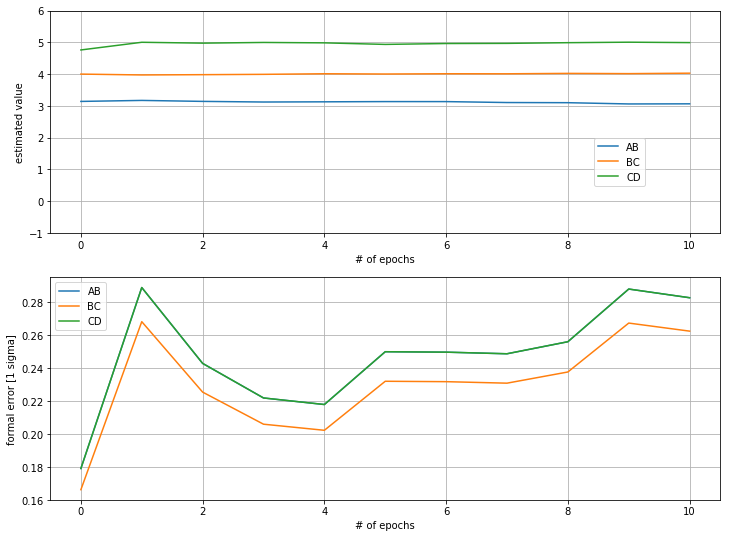

In [9]:
plt.figure(1,figsize=(12, 9))
ax=plt.subplot(211)    
plt.plot(time_array, AB_array, label='AB')
plt.plot(time_array, BC_array, label='BC')
plt.plot(time_array, CD_array, label='CD')
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 0.45))
axes = plt.gca()
axes.set_ylim([-1,6])
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('estimated value')
plt.subplot(212)
plt.plot(time_array, sigmaAB, label='AB')
plt.plot(time_array, sigmaBC, label='BC')
plt.plot(time_array, sigmaCD, label='CD')
plt.legend()
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('formal error [1 sigma]')
plt.show()

## Aufgabe 2:

In [10]:
input2 = np.loadtxt("ue01_bsp2.txt")
print(input2)

[[ 1.   0.6  4.2 10.   4.5 14.1]
 [ 2.   1.5  4.   8.3  5.5 12.2]
 [ 3.   1.8  3.9  6.7  5.9 10.8]
 [ 4.   2.6  4.   5.7  6.7  9.9]
 [ 5.   2.8  3.9  5.3  7.3  9.1]
 [ 6.   3.   4.   4.8  7.3  9.2]
 [ 7.   2.8  4.   5.1  7.3  9.1]
 [ 8.   2.5  3.9  5.7  6.9  9.9]
 [ 9.   2.2  3.9  6.7  6.1 10.7]
 [10.   1.3  4.   8.1  5.4 11.9]
 [11.   0.6  3.9 10.2  4.6 13.9]]


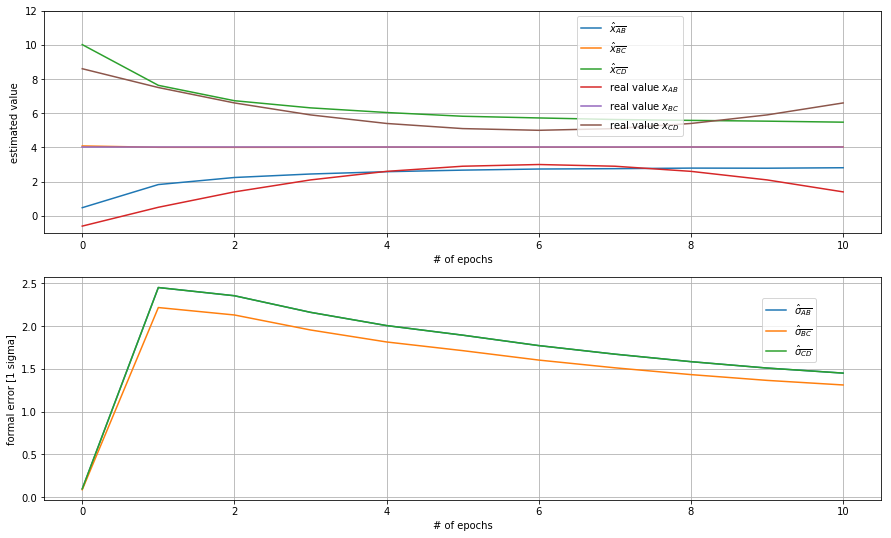

In [11]:
# processing the observations at t=0
m = 5.0
n = 3.0
t = 0
y = input2[t,1:,] # Get First Row of imported Dateset
y = y[:, np.newaxis] # For visual improvement -> [1x5] vector to [5x1]  
A = np.matrix([[ 1, 0, 0], [ 0, 1, 0 ], [ 0, 0, 1 ], [ 1, 1, 0 ], [ 0, 1, 1 ]])
P = np.diag([0.1,0.1,0.1,0.2,0.2])

x_hat = inv(np.transpose(A) @ P @ A) @ np.transpose(A) @ P @ y
y_hat = A @ x_hat
e_hat = y - y_hat
probe_ortho = np.transpose(A) @ P @ e_hat
probe_haupt = y_hat - A @ x_hat
# print Orthogonalitätsprobe
#print('Orthogonalitätsprobe = \n {} \n'.format(probe_ortho))
# print Hauptprobe
#print('Hauptprobe = \n {} \n'.format(probe_haupt))

# Ausgleichung
s02 = np.asscalar((np.transpose(e_hat) @ P @ e_hat)/(m-n))

Sxx = s02 * inv(np.transpose(A) @ P @ A)
Syy = A @ Sxx @ np.transpose(A)

#print(Sxx)
#display(Math('\hat{{\sigma}}={}'.format(s02)));
#display(Math('\hat{{\sum}}_{\hat{x}}='));
#print(Sxx)
#display(Math('\hat{{\sum}}_{\hat{y}}='));
#print(Syy)

#some arrays which we use later for plotting
time_array = np.arange(0,11)
AB_array = np.zeros(11)
BC_array = np.zeros(11)
CD_array = np.zeros(11)
sigmaAB = np.zeros(11)
sigmaBC = np.zeros(11)
sigmaCD = np.zeros(11)
AB_real = np.zeros(11)
BC_real = np.zeros(11)
CD_real = np.zeros(11)

#store the results in the first array element
time_array[0] = 0
AB_array[0] = x_hat[0]
BC_array[0] = x_hat[1]
CD_array[0] = x_hat[2]
sigmaAB[0] = np.sqrt(Sxx[0,0])
sigmaBC[0] = np.sqrt(Sxx[1,1])
sigmaCD[0] = np.sqrt(Sxx[2,2])
#calculate real values and store the results in first array element
AB_real[0] = 3-0.1*(0-6)**2
CD_real[0] = 5+0.1*(0-6)**2

#print(Sxx)
#processing the observations at t_k
for t in np.arange(1,11):
    #storing the "old" states and variances
    x_hat_old = x_hat
    s02_old = s02
    Sxx_old = Sxx
    
    #processing the observations at t_k
    A = A # Same Designmatrix A for each epoche
    y = input1[t,1:,] # Get First Row of imported Dateset
    y = y[:, np.newaxis] # For visual improvement -> [1x5] vector to [5x1]  
    x_hat = x_hat_old + inv(s02_old * inv(Sxx_old) + np.transpose(A) @ P @ A) @ np.transpose(A) @ P @ (y-A @ x_hat_old)
    dx_hat = x_hat - x_hat_old
    y_hat = A @ x_hat
    e_hat = y - y_hat
    s02 = np.asscalar(1.0/(m-n) * (s02_old * (m-n + np.transpose(dx_hat) @ inv(Sxx_old) @ dx_hat) + np.transpose(e_hat) @ P @ e_hat))
    Sxx = s02 * inv(s02_old * inv(Sxx_old) + np.transpose(A) @ P @ A)
    
    #probe_ortho = np.transpose(A) @ P @ e_hat
    #probe_haupt = y_hat - A @ x_hat
    # Print Orthogonalitätsprobe
    #print('Orthogonalitätsprobe = \n {} \n'.format(probe_ortho))
    # Print Hauptprobe
    #print('Hauptprobe = \n {} \n'.format(probe_haupt))
    
    #storing the solution in the array which we will later use for plotting
    time_array[t]=t
    AB_array[t]=x_hat[0]
    BC_array[t]=x_hat[1]
    CD_array[t]=x_hat[2]
    sigmaAB[t]=np.sqrt(Sxx[0,0])
    sigmaBC[t]=np.sqrt(Sxx[1,1])
    sigmaCD[t]=np.sqrt(Sxx[2,2])
    
    # real values for AB and CD
    AB_real[t] = 3-0.1*(t-6)**2
    CD_real[t] = 5+0.1*(t-6)**2
    
# real value for BC
BC_real = np.full((1, 11), 4.0)

# plot
plt.figure(1,figsize=(15, 9))
ax=plt.subplot(211)    
plt.plot(time_array, AB_array, label='$\hat{x}_\overline{AB}$')
plt.plot(time_array, BC_array, label='$\hat{x}_\overline{BC}$')
plt.plot(time_array, CD_array, label='$\hat{x}_\overline{CD}$')
plt.plot(time_array, AB_real, label = 'real value $x_{AB}$')
plt.plot(time_array, BC_real[0], label = 'real value $x_{BC}$')
plt.plot(time_array, CD_real, label = 'real value $x_{CD}$')
ax.legend(loc='upper center', bbox_to_anchor=(0.70, 1))
axes = plt.gca()
axes.set_ylim([-1,12])
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('estimated value')
ax2=plt.subplot(212)
plt.plot(time_array, sigmaAB, label='$\hat{\sigma}_{\overline{AB}}$')
plt.plot(time_array, sigmaBC, label='$\hat{\sigma}_{\overline{BC}}$')
plt.plot(time_array, sigmaCD, label='$\hat{\sigma}_{\overline{CD}}$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.89, 0.93))
#plt.legend()
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('formal error [1 sigma]')
plt.show()

Diskussion der Unterschiede und Beschreibung der zeitlichen Abhängigkeit der formellen Fehler:
- Die Varianz der Strecke AB und der Strecke CD sind identisch, liegt daran, dass die Abweichung der Strecken an der x-Achse gespiegelt sind
- AB entspricht einer nach unten geöffneten Parabel, wohingegen CD einer nach oben geöffneten Parabel entspricht
- BC ist schnell ausgeglichen, da es sich um eine Konstante handelt (Real BC = 4)

## Aufgabe 3:

## Aufgabe 4:
Berechne für das lineare Anfangswertproblem der Form:

$\quad y'=t^2+2t-y+1 \quad y(0)=0 $

den Wert der Funktion $y(t)$ an der Stelle $t=0.4$ mithilfe des Runge-Kutta Verfahrens 3. und 4. Ordnung mit der Schrittweite $h=0.1$.

In [12]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def DGL(y, t):
    f = t**2+2*t-y+1
    return (f)

# Runge Kutta, 3rd order
def RK3(y, t, h):
    k1 = DGL(y, t)
    k2 = DGL(y + h/2 * k1, t + h/2)
    k3 = DGL(y - h * k1 + 2 * h * k2, t + h) 
    y_result = y + h/6 * (k1 + 4*k2 + k3)
    return (y_result)

# Runge Kutta, 4th order
def RK4(y, t, h):
    k1 = DGL(y, t)
    k2 = DGL(y + h/2 * k1, t + h/2)
    k3 = DGL(y + h/2 * k2, t + h/2)
    k4 = DGL(y + h * k3, t + h)
    y_result = y + h/6 * (k1 + 2*k2 + 2*k3 + 2*k4)
    return (y_result)

In [13]:
t = 0.4
N = int(t/h + 1) # 5 steps with size 0.1
t = np.linspace(0.0, t, num=N)

y_RK3_all=np.zeros(N)
y_RK4_all=np.zeros(N)

y = 0
h = 0.1

# Runge-Kutta 3
for i in range (0,len(t)-1):
    (y) = RK3(y, t[i], h)
    y_RK3_all[i+1] = y
    
# Runge-Kutta 4
y = 0
h = 0.1
for i in range (0,len(t)-1):
    (y) = RK4(y, t[i], h)
    y_RK4_all[i+1] = y
    
print('Matrizen mit den aus den einzelnen Schritten hervorgehenden Werten des RK 3. Ordnung:')
print(y_RK3_all)

print('Matrizen mit den aus den einzelnen Schritten hervorgehenden Werten des RK 4. Ordnung:')
print(y_RK4_all)
print('')


print('\033[4m\033[1m' "Runge-Kutta 3. Ordnung:")
display(Math('\quad y(t = 0.4)={:.4f}'.format(y_RK3_all[4])));

print('\033[4m\033[1m' "Runge-Kutta 4. Ordnung:")
display(Math('\quad y(t = 0.4)={:.4f}'.format(y_RK4_all[4])));

NameError: name 'h' is not defined

## Aufgabe 5